Ссылка на датасет: https://www.kaggle.com/datasets/beridzeg45/usa-car-market

Набор данных содержит информацию о ценах на автомобили с американского онлайн-рынка.

Столбцы в датасете: Make, Year, Condition, Mileage, Price, Seller Rating, Seller Rating Count, Interior color, Drivetrain, Min MPG, Max MPG, Fuel type, Engine Size (L), Accidents or damage, 1-owner vehicle, Personal use only, Clean title, Open recall, Comfort_score, Interior_score, Performance_score, Value_score, Exterior_score, Reliability_score

Задача: предсказание цены автомобиля

Целевая переменная: Price

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV
import re

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cars_for_sale.csv", sep = ',')
df

,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9011,Jeep,2024,New,10.0,52301.0,4.0,54.0,Global Black,Four-wheel Drive,18.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
9012,BMW,2022,Used,48804.0,27979.0,4.8,3739.0,Canberra Beige,All-wheel Drive,21.0,...,True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9013,GMC,2024,New,3.0,51080.0,4.5,3896.0,Black,Four-wheel Drive,17.0,...,NaN,NaN,NaN,0,5.0,5.0,5.0,4.0,5.0,5.0
9014,GMC,2012,Used,146694.0,8995.0,NaN,NaN,Jet Black,All-wheel Drive,20.0,...,False,True,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Количество строк: 9016
Количество столбцов: 24


In [ ]:
df.describe() # статистическая информацию

,Year,Mileage,Price,Seller Rating,Seller Rating Count,Min MPG,Max MPG,Engine Size (L),Accidents or damage,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
count,9016.000000,8867.000000,9.016000e+03,7661.000000,7661.000000,7421.000000,7421.000000,8251.000000,5400.000000,9016.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4310.000000
mean,2019.456300,36301.668546,4.008421e+04,4.381504,1432.193578,20.775771,26.510982,2.964659,0.330000,0.071761,4.598495,4.563383,4.543776,4.407889,4.727086,4.484455
std,6.449194,44208.902388,4.259945e+04,0.609913,1592.647184,7.217294,8.593017,1.325837,0.470256,0.258107,0.838355,0.818943,0.865939,1.028365,0.697989,1.039983
min,1959.000000,0.000000,1.997000e+03,1.300000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,10.000000,2.149000e+04,4.200000,235.000000,17.000000,24.000000,2.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
50%,2022.000000,18944.000000,3.238300e+04,4.600000,990.000000,21.000000,28.000000,2.500000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,2024.000000,62501.000000,4.899100e+04,4.800000,2044.000000,25.000000,32.000000,3.600000,1.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2025.000000,324349.000000,1.699800e+06,5.000000,11663.000000,150.000000,122.000000,8.400000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


count: это количество непустых значений в каждом столбце.

mean: среднее значение каждого столбца.

std: разброс значений в столбце от их среднего значения.

min: это наименьшее значение в каждом столбце.

25%, 50%, 75%: это значения, ниже которых попадает 25%, 50% (медиана) и 75% соответственно наблюдений.

max: это наибольшее значение в каждом столбце.

In [ ]:
print(f"Названия столбцов: {', '.join(df.columns)}")

Названия столбцов: Make, Year, Condition, Mileage, Price, Seller Rating, Seller Rating Count, Interior color, Drivetrain, Min MPG, Max MPG, Fuel type, Engine Size (L), Accidents or damage, 1-owner vehicle, Personal use only, Clean title, Open recall, Comfort_score, Interior_score, Performance_score, Value_score, Exterior_score, Reliability_score


In [ ]:
print(f"Первые 5 строк:\n")
df.head()

Первые 5 строк:



,Make,Year,Condition,Mileage,Price,Seller Rating,Seller Rating Count,Interior color,Drivetrain,Min MPG,...,1-owner vehicle,Personal use only,Clean title,Open recall,Comfort_score,Interior_score,Performance_score,Value_score,Exterior_score,Reliability_score
0,Lexus,2024,New,0.0,112865.0,4.7,1261.0,Black,Rear-wheel Drive,15.0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Acura,2007,Used,61110.0,11295.0,4.2,440.0,–,Front-wheel Drive,22.0,...,True,True,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,McLaren,2016,Used,6305.0,219997.0,3.1,421.0,Carbon Black,Rear-wheel Drive,NaN,...,False,False,NaN,0,5.0,5.0,5.0,5.0,5.0,5.0
3,Audi,2016,Used,65715.0,23999.0,3.6,123.0,Black,All-wheel Drive,23.0,...,False,True,True,0,3.0,5.0,5.0,5.0,5.0,5.0
4,BMW,2018,Used,19830.0,39799.0,4.4,91.0,Black,All-wheel Drive,0.0,...,True,False,True,0,5.0,5.0,5.0,5.0,5.0,5.0


Датасет содержит много пустых значений. Это стало понятно еще после первого его вывода, поэтому нужно посмотреть сколько пустых значений в каждом стобце.

In [ ]:
null_counts = df.isnull().sum()

print("Количество пустых значений в каждом столбце:\nНазвание             Количество")
print(null_counts)

Количество пустых значений в каждом столбце:
Название             Количество
Make                      0
Year                      0
Condition                 0
Mileage                 149
Price                     0
Seller Rating          1355
Seller Rating Count    1355
Interior color            0
Drivetrain                0
Min MPG                1595
Max MPG                1595
Fuel type               575
Engine Size (L)         765
Accidents or damage    3616
1-owner vehicle        3642
Personal use only      3616
Clean title            7685
Open recall               0
Comfort_score          4630
Interior_score         4630
Performance_score      4630
Value_score            4630
Exterior_score         4630
Reliability_score      4706
dtype: int64


Как я и думал, во многих столбцах не заполнена половина строк, где-то 1/9 часть, что все равно много. Я решил удалить их, так как эти заполнить эти пропущенные значения не является возможным, так как, например, средняя оценка салона машины не будет релаьной.

Удаляю все, где больше 765 пропусков, так как столбцец, в котором указан литраж двигателя очень важен

In [ ]:
df = df.dropna(axis=1, thresh=df.shape[0] - 765) #  удаляем все столбцы, в которых количество пропущенных значений превышает 765

row1 = len(df)
df = df.dropna() # удаляем все строки с пропущенными значениями
row2 = len(df)

print(f"Изначальное количество строк: {row1}")
print(f"Было удалено {row1 - row2} строк")
print(f"Итоговое количество строк: {row2}")
print(f"Процент удаленных строк: {((row1-row2)/row1)*100:.2f}%")

Изначальное количество строк: 9016
Было удалено 931 строк
Итоговое количество строк: 8085
Процент удаленных строк: 10.33%


In [ ]:
for i in df:
    print(f"Количество уникальных значений в столбце {i}: {df[i].value_counts().shape[0]}")

Количество уникальных значений в столбце Make: 51
Количество уникальных значений в столбце Year: 50
Количество уникальных значений в столбце Condition: 3
Количество уникальных значений в столбце Mileage: 3669
Количество уникальных значений в столбце Price: 3995
Количество уникальных значений в столбце Interior color: 562
Количество уникальных значений в столбце Drivetrain: 10
Количество уникальных значений в столбце Fuel type: 8
Количество уникальных значений в столбце Engine Size (L): 60
Количество уникальных значений в столбце Open recall: 2


Смотрим уникальные значения в столобцах Make, Year, Condition, Drivetrain, Fuel type, Engine Size (L), Open recall, чтобы понять, имеют ли там значения одинаковую структуру


In [ ]:
unique_values = df['Make'].unique()
print(f"Значниея в столбце 'Make': {', '.join(unique_values)}")

unique_values = df['Year'].unique()
print(f"Значниея в столбце 'Year': {', '.join(map(str,unique_values))}")

unique_values = df['Condition'].unique()
print(f"Значниея в столбце 'Condition': {', '.join(map(str,unique_values))}")

unique_values = df['Drivetrain'].unique()
print(f"Значниея в столбце 'Drivetrain': {', '.join(unique_values)}")

unique_values = df['Fuel type'].unique()
print(f"Значниея в столбце 'Fuel type': {', '.join(unique_values)}")

unique_values = df['Engine Size (L)'].unique()
print(f"Значниея в столбце 'Engine Size (L)': {', '.join(map(str,unique_values))}")

unique_values = df['Open recall'].unique()
print(f"Значниея в столбце 'Open recall': {', '.join(map(str,unique_values))}")

Значниея в столбце 'Make': Lexus, Acura, McLaren, Audi, BMW, Jeep, Cadillac, Nissan, Chrysler, Ford, Toyota, INFINITI, Volkswagen, Jaguar, Subaru, Mercedes-Benz, Pontiac, Scion, Porsche, Aston, Chevrolet, Mazda, Honda, Lincoln, Saturn, Lotus, Rolls-Royce, Genesis, Dodge, Hyundai, GMC, Mitsubishi, Maserati, Kia, Lamborghini, Buick, RAM, Volvo, Hummer, Ferrari, Mercury, Saab, FIAT, Bentley, MINI, Isuzu, Land, Alfa, Oldsmobile, Bugatti, Polestar
Значниея в столбце 'Year': 2024, 2007, 2016, 2018, 2019, 2012, 2008, 2013, 2002, 2020, 2014, 2015, 2004, 2000, 2011, 2023, 2006, 1988, 2009, 2005, 2017, 2010, 2022, 2021, 2003, 2001, 1993, 1971, 1985, 1999, 1989, 1994, 1992, 1991, 1984, 1995, 1972, 2025, 1998, 1997, 1990, 1996, 1982, 1960, 1959, 1970, 1987, 1976, 1966, 1983
Значниея в столбце 'Condition': New, Used, Certified
Значниея в столбце 'Drivetrain': Rear-wheel Drive , Front-wheel Drive , All-wheel Drive , Four-wheel Drive , FWD , – , Unknown , AWD , 4WD , RWD 
Значниея в столбце 'Fuel typ

В столбце Drivetrain и Fuel type есть проблемы. Есть значения "-" и "unknown", что эквавалентно пропущенному, нужно удалить их

In [ ]:
count = df[(df['Drivetrain'] == '– ') | (df['Drivetrain'] == 'Unknown ')].shape[0] # подсчет строк, где в столбце 'Drivetrain' значение равно "- " или "Unknown "
print(f"Количество строк с значением '– ' или 'Unknown ' в столбце 'Drivetrain': {count}")

count = df[(df['Fuel type'] == '– ')].shape[0]
print(f"Количество строк с значением '– ' в столбце 'Fuel type': {count}")

Количество строк с значением '– ' или 'Unknown ' в столбце 'Drivetrain': 46
Количество строк с значением '– ' в столбце 'Fuel type': 16


Плохих значение немного, можно просто удалить строки, где они встречаются

In [ ]:
row1 = len(df)
df.drop(df[df['Drivetrain'] == 'Unknown '].index, inplace=True)
df.drop(df[df['Drivetrain'] == '– '].index, inplace=True)
df.drop(df[df['Fuel type'] == '– '].index, inplace=True)
row2 = len(df)

print(f"Изначальное количество строк: {row1}")
print(f"Было удалено {row1 - row2} строк")
print(f"Итоговое количество строк: {row2}")
print(f"Процент удаленных строк: {((row1-row2)/row1)*100:.2f}%")

Изначальное количество строк: 8085
Было удалено 62 строк
Итоговое количество строк: 8023
Процент удаленных строк: 0.77%


Теперь датасет почищен, можно посмотреть сколько строк и столбцов осталось

In [ ]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print(f"Названия столбцов: {', '.join(df.columns)}")

Количество строк: 8023
Количество столбцов: 10
Названия столбцов: Make, Year, Condition, Mileage, Price, Interior color, Drivetrain, Fuel type, Engine Size (L), Open recall


Переводим все категориальные значения в количественные

In [ ]:
categorical_columns = ['Make', 'Condition', 'Interior color', 'Drivetrain', 'Fuel type'] # все категориальные столбцы

label_encoder = LabelEncoder()
for column in categorical_columns: # преобразование категориальных столбцов
    df.loc[:,column] = label_encoder.fit_transform(df[column])

df

,Make,Year,Condition,Mileage,Price,Interior color,Drivetrain,Fuel type,Engine Size (L),Open recall
0,27,2024,1,0.0,112865.0,46,7,4,5.0,0
1,0,2007,2,61110.0,11295.0,557,5,4,2.4,0
2,33,2016,2,6305.0,219997.0,130,7,4,3.8,0
3,3,2016,2,65715.0,23999.0,46,2,4,2.0,0
4,4,2018,2,19830.0,39799.0,46,2,4,2.0,0
...,...,...,...,...,...,...,...,...,...,...
9011,23,2024,1,10.0,52301.0,259,4,4,3.6,0
9012,4,2022,2,48804.0,27979.0,119,2,4,2.0,0
9013,15,2024,1,3.0,51080.0,46,4,4,5.3,0
9014,15,2012,2,146694.0,8995.0,288,2,4,2.4,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8023 entries, 0 to 9015
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             8023 non-null   object 
 1   Year             8023 non-null   int64  
 2   Condition        8023 non-null   object 
 3   Mileage          8023 non-null   float64
 4   Price            8023 non-null   float64
 5   Interior color   8023 non-null   object 
 6   Drivetrain       8023 non-null   object 
 7   Fuel type        8023 non-null   object 
 8   Engine Size (L)  8023 non-null   float64
 9   Open recall      8023 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 947.5+ KB


Видно, что не все значения имееют тип float или int, а имеют тип object, хотя я избавился от категориальных данных, поэтому нужно преобразовать все данные в тип float

In [ ]:
for column in df.columns:
    df[column] = df[column].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8023 entries, 0 to 9015
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             8023 non-null   float64
 1   Year             8023 non-null   float64
 2   Condition        8023 non-null   float64
 3   Mileage          8023 non-null   float64
 4   Price            8023 non-null   float64
 5   Interior color   8023 non-null   float64
 6   Drivetrain       8023 non-null   float64
 7   Fuel type        8023 non-null   float64
 8   Engine Size (L)  8023 non-null   float64
 9   Open recall      8023 non-null   float64
dtypes: float64(10)
memory usage: 947.5 KB


Теперь датасет почищен и все значения приведены к одному типу.

Можно посмотреть на гистограммы со значениями в столбцах

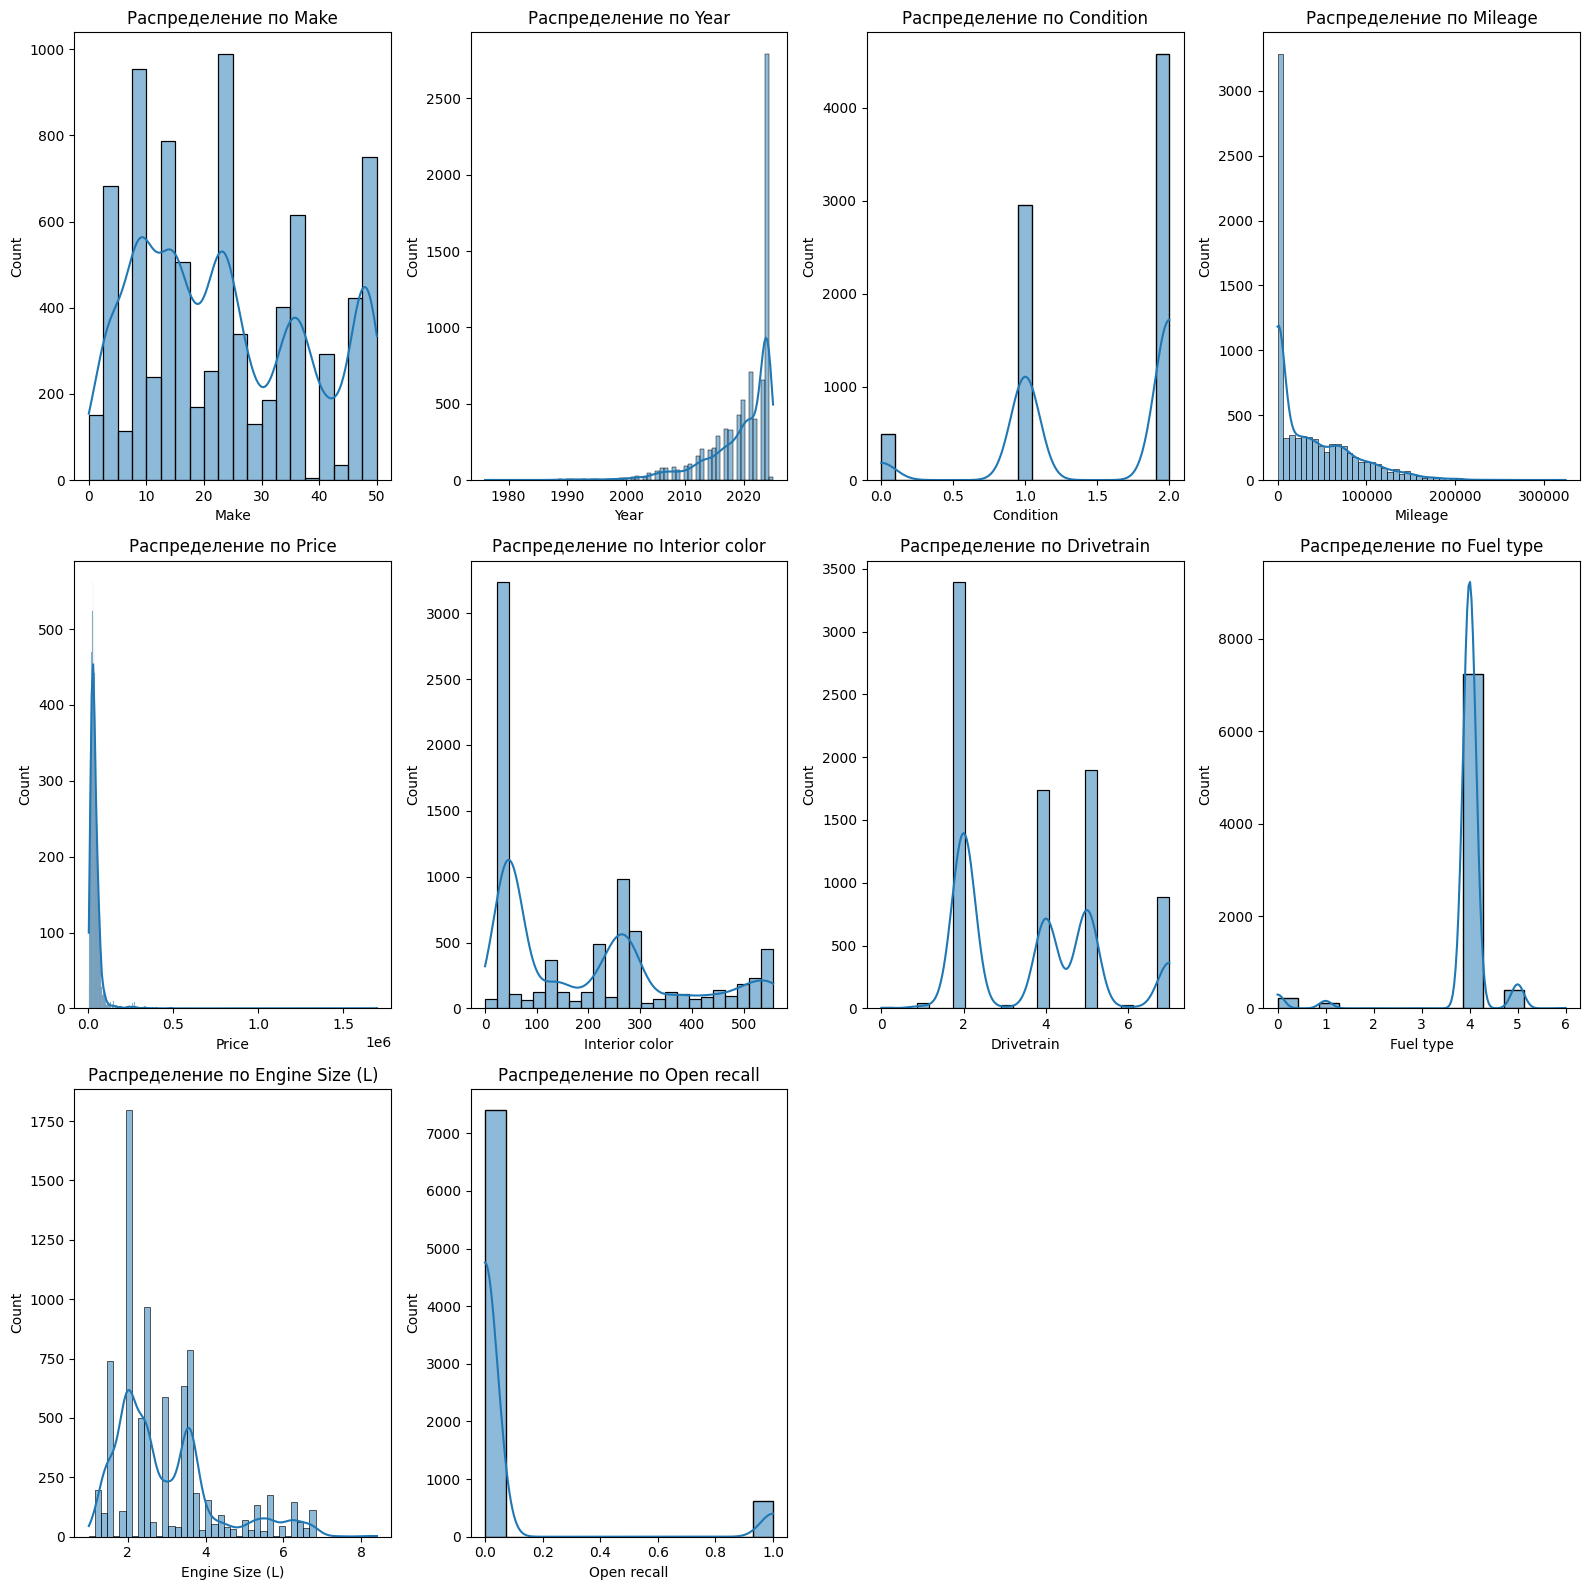

In [ ]:
plt.figure(figsize=(16,16))
for i, col in enumerate(df.columns):
  plt.subplot(3, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Распределение по {col}")
  plt.tight_layout()
  plt.plot()

In [ ]:
corr_matrix = df.corr()
print(f"Корреляционная матрица между всеми признаками в формате таблицы:\n")
corr_matrix

Корреляционная матрица между всеми признаками в формате таблицы:



,Make,Year,Condition,Mileage,Price,Interior color,Drivetrain,Fuel type,Engine Size (L),Open recall
Make,1.000000,0.058692,-0.117979,-0.095938,-0.013466,-0.015751,-0.041008,-0.062770,-0.085991,-0.018675
Year,0.058692,1.000000,-0.532331,-0.698814,0.187175,-0.022217,-0.307117,0.015881,-0.215630,-0.115011
Condition,-0.117979,-0.532331,1.000000,0.564961,-0.184783,-0.005272,0.142115,0.000782,0.114172,0.204226
Mileage,-0.095938,-0.698814,0.564961,1.000000,-0.330535,-0.005965,0.145799,-0.044176,0.134361,0.178493
Price,-0.013466,0.187175,-0.184783,-0.330535,1.000000,0.018587,0.001296,-0.033111,0.286560,-0.073659
Interior color,-0.015751,-0.022217,-0.005272,-0.005965,0.018587,1.000000,0.045644,-0.015958,0.022154,-0.009548
Drivetrain,-0.041008,-0.307117,0.142115,0.145799,0.001296,0.045644,1.000000,-0.153200,0.192873,0.026033
Fuel type,-0.062770,0.015881,0.000782,-0.044176,-0.033111,-0.015958,-0.153200,1.000000,-0.220496,0.016128
Engine Size (L),-0.085991,-0.215630,0.114172,0.134361,0.286560,0.022154,0.192873,-0.220496,1.000000,-0.000134
Open recall,-0.018675,-0.115011,0.204226,0.178493,-0.073659,-0.009548,0.026033,0.016128,-0.000134,1.000000


Корреляционная матрица между всеми признаками в виде тепловой карты:



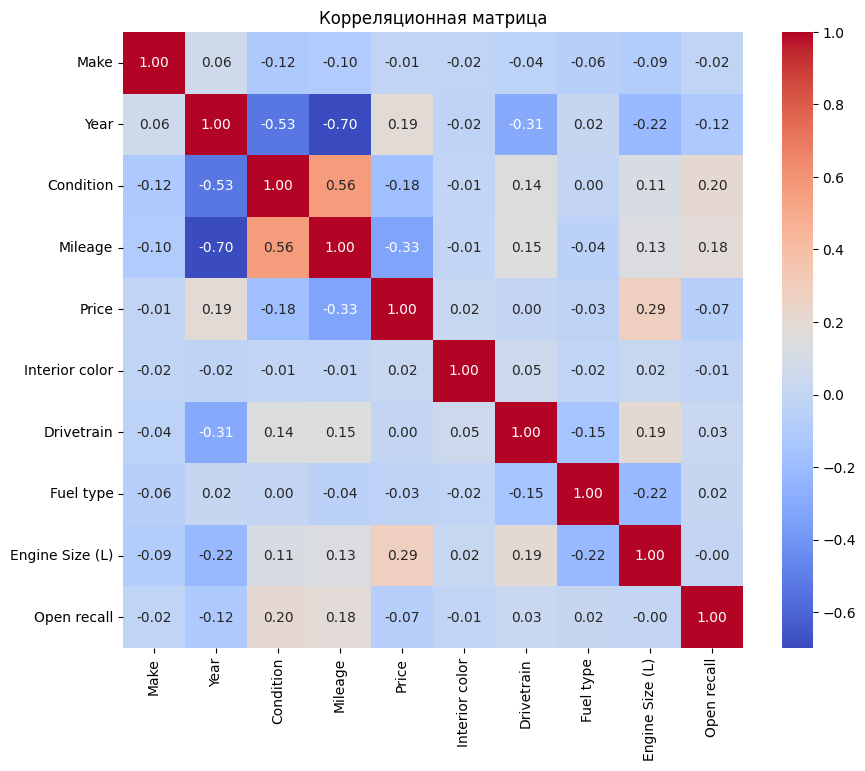

In [ ]:
print(f"Корреляционная матрица между всеми признаками в виде тепловой карты:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

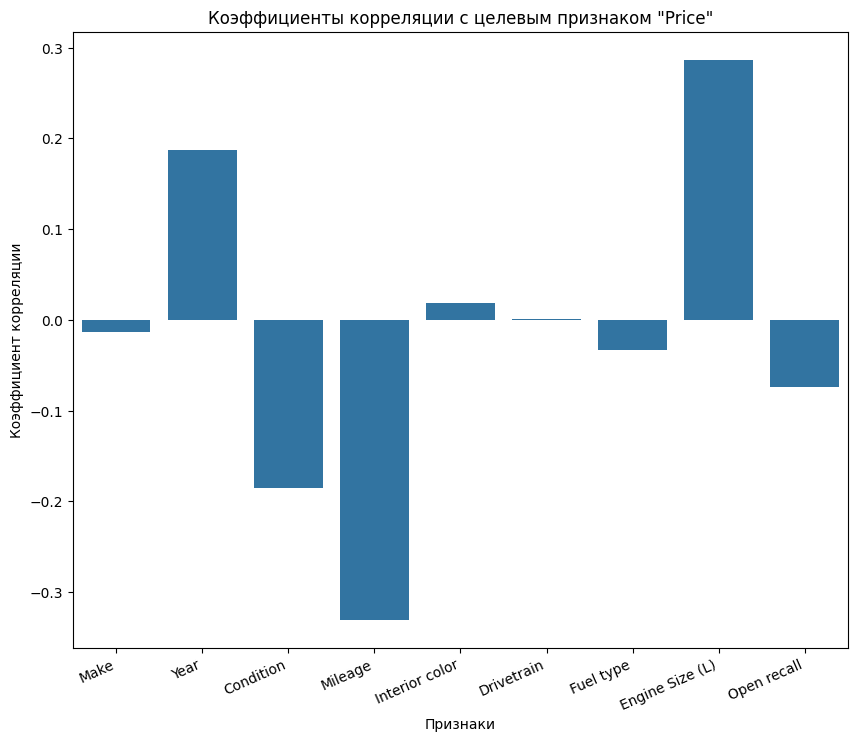

In [ ]:
target_corr = df.drop('Price', axis=1).corrwith(df['Price']) # вычисление корреляции с целевым признаком Price

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title('Коэффициенты корреляции с целевым признаком "Price"')
plt.xlabel('Признаки')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=24, ha='right')
plt.show()

Из этой корреляционной матрицы можно сделать несколько выводов о целевой переменной 'Price':

'Price' сильно коррелирует с 'Year' (0.19) и 'Engine size (L)' (0.3), так как более действительно чем новее и мощнее машина, тем она дороже. А если машина прошла много КМ или она БУ, то цена падает (отрицательная корреляция с 'Condition' и 'Mileage')

Выбранные метрики:

1.Линейная регрессия

2.Ridge и Lasso

3.Decision Tree

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разбиваем данные на обучающий и тестовый наборы

In [ ]:
model = LinearRegression() # линейная регрессия
model.fit(X_train, y_train)

y_pred = model.predict(X_test) # предсказание на тестовом наборе

mse = mean_squared_error(y_test, y_pred) # вычисляем MSE
r2 = r2_score(y_test, y_pred) # вычисляем R^2

print(f"Значение MSE: {mse}")
print(f"Значение R^2: {r2}")

Значение MSE: 863307209.8111676
Значение R^2: 0.2830039544988918


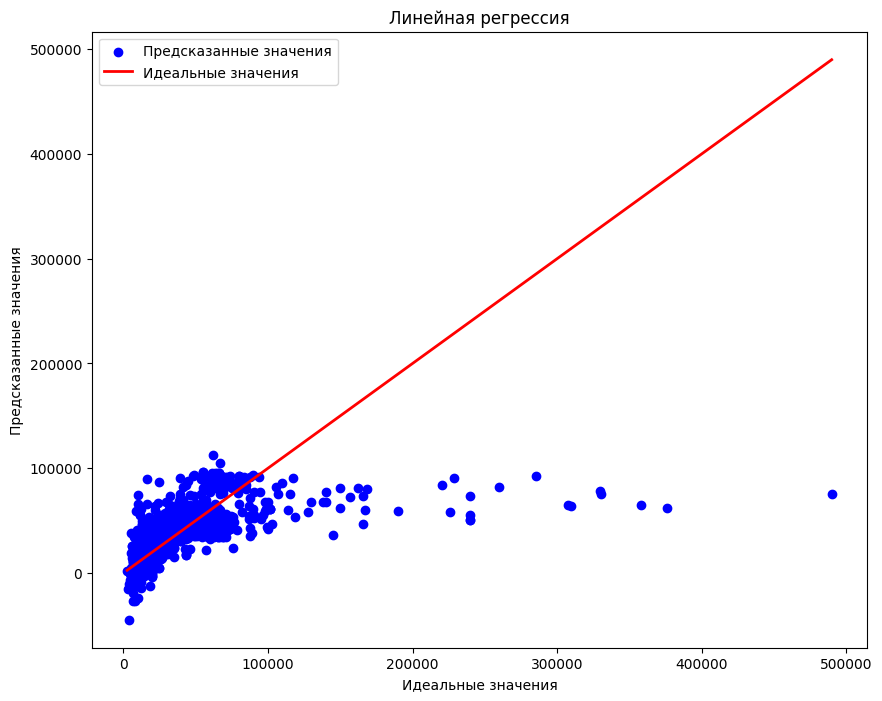

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Идеальные значения')
plt.title('Линейная регрессия')
plt.xlabel('Идеальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Значение MSE является мерой среднеквадратичной ошибки модели. Чем меньше это значение, тем лучше модель. В моём случае MSE очень большое, что может указывать на то, что модель плохо справляется с предсказанием данных.

Значение R^2 (коэффициент детерминации) показывает, как хорошо модель соответствует данным. Он находится в диапазоне от 0 до 1, где 1 означает идеальное соответствие модели данным, а 0 означает, что модель не объясняет никакой дисперсии в данных. Значение R^2 = 0.283 означает, что модель не очень хорошо соответствует данным.

In [ ]:
ridge_cv_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])  # список значений alpha для кросс-валидации
ridge_cv_model.fit(X_train, y_train)

optimal_alpha_ridge = ridge_cv_model.alpha_ # оптимальное значения alpha для модели Ridge

ridge_model = Ridge(alpha=optimal_alpha_ridge)  # создание модели Ridge
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test) # предсказаниt на тестовом наборе

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f"Значение alpha: {optimal_alpha_ridge}")
print(f"Значение Ridge MSE: {ridge_mse}")
print(f"Значение Ridge R^2: {ridge_r2}")

Значение alpha: 10.0
Значение Ridge MSE: 863237546.1341219
Значение Ridge R^2: 0.28306181174876677


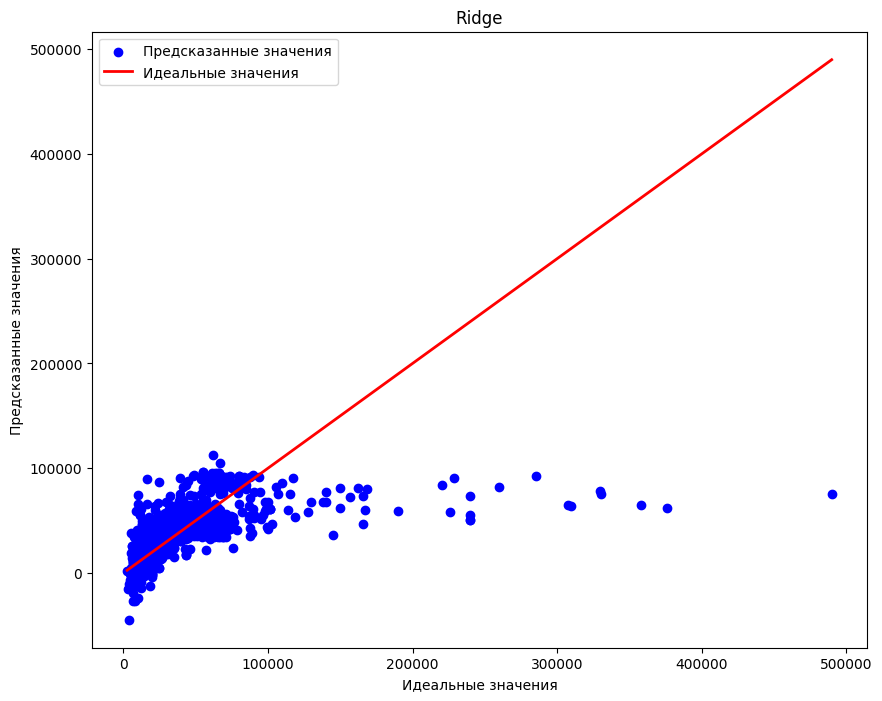

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, ridge_predictions, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Идеальные значения')
plt.title('Ridge')
plt.xlabel('Идеальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Коэффициенты Ridge:
           Feature   Coefficient
0             Make    -68.955153
1             Year   -213.725162
2        Condition  -1501.180295
3          Mileage     -0.372650
4   Interior color     -0.059544
5       Drivetrain   -565.190898
6        Fuel type   1114.960430
7  Engine Size (L)  11785.927879
8      Open recall   -616.149328 



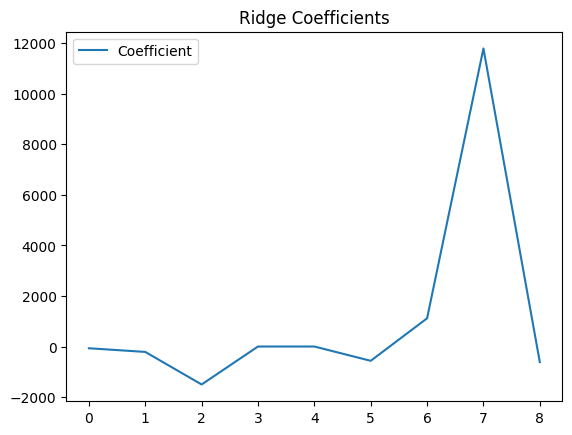

In [ ]:
print("Коэффициенты Ridge:")
ridge_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_cv_model.coef_})
print(ridge_coefs,"\n")

ridge_coefs.plot(title="Ridge Coefficients")
plt.show()

После применения Ridge регрессии значения MSE и R^2 по сравнению с результатами линейной регрессии почти не изменились.

Значение MSE составляет около 863237546.13, что несколько меньше, чем при линейной регрессии, но незначительно.

Значение R^2 приблизительно равно 0.283, что также незначительно изменилось по сравнению с результатами линейной регрессии.

In [ ]:
lasso_cv_model = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0])  # список значений alpha для кросс-валидации
lasso_cv_model.fit(X_train, y_train)

optimal_alpha_lasso = lasso_cv_model.alpha_ # оптимальное значения alpha для модели Lasso

lasso_model = Lasso(alpha=optimal_alpha_lasso)  # создание модели Lasso
lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f"Значение alpha: {optimal_alpha_lasso}")
print(f"Значение Lasso MSE: {lasso_mse}")
print(f"Значение Lasso R^2: {lasso_r2}")

Значение alpha: 10.0
Значение Lasso MSE: 863253950.3877221
Значение Lasso R^2: 0.2830481876473726


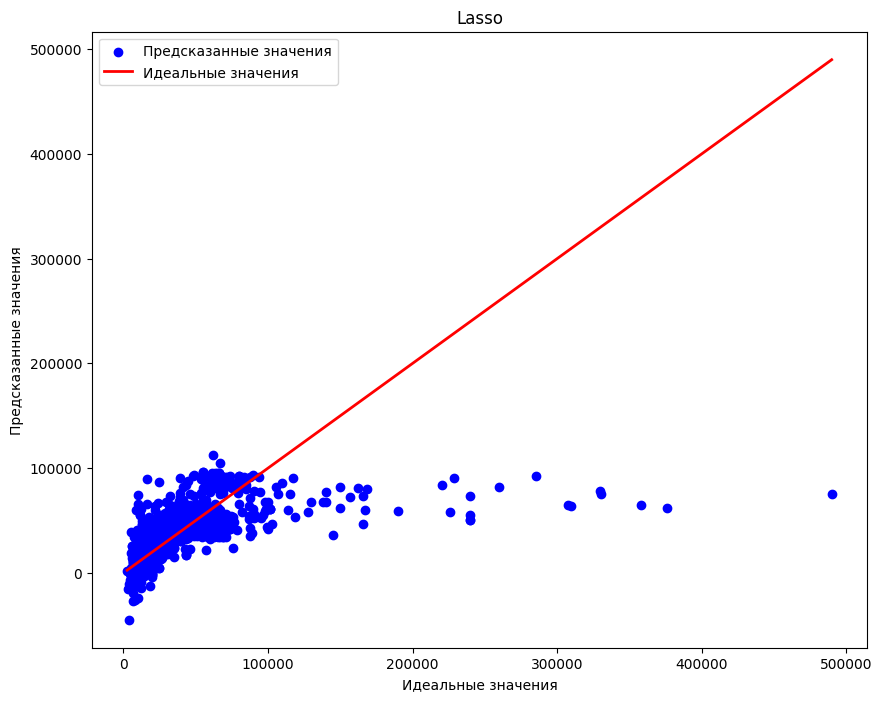

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, lasso_predictions, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Идеальные значения')
plt.title('Lasso')
plt.xlabel('Идеальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Коэффициенты Lasso:
           Feature   Coefficient
0             Make    -68.843245
1             Year   -212.116289
2        Condition  -1476.453765
3          Mileage     -0.373043
4   Interior color     -0.061596
5       Drivetrain   -562.809413
6        Fuel type   1102.367714
7  Engine Size (L)  11789.992480
8      Open recall   -491.872108 



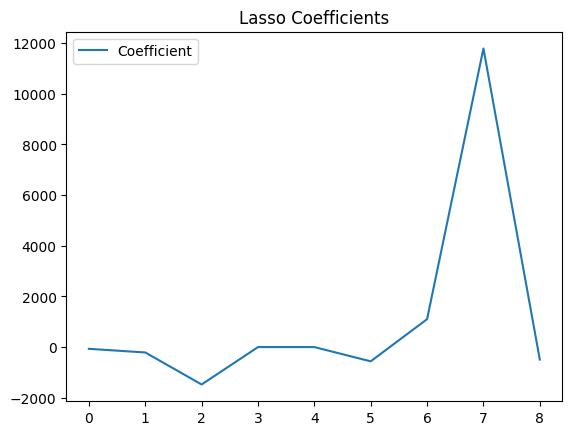

In [ ]:
print("Коэффициенты Lasso:")
lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv_model.coef_})
print(lasso_coefs,"\n")

lasso_coefs.plot(title="Lasso Coefficients")
plt.show()

Значения практически такие же. Результат неудовлетворительный

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f"Значение Tree MSE: {tree_mse}")
print(f"Значение Tree R^2: {tree_r2}")

Значение Tree MSE: 293079005.83276796
Значение Tree R^2: 0.7565912970338169


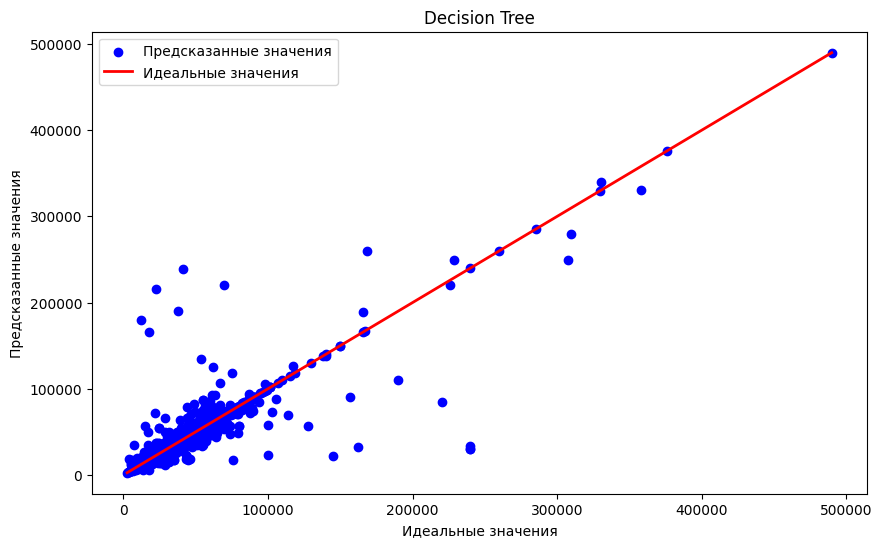

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tree_predictions, color='blue', label='Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Идеальные значения')
plt.title('Decision Tree')
plt.xlabel('Идеальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.show()

Результаты модели, основанной на деревьях решений, показывают существенное улучшение по сравнению с предыдущими моделями, так как значение MSE существенно снизилось , а значение R^2 увеличилось до +-0.757.

Значит модель, основанная на деревьях решений, лучше подходит для этого набора данных, чем предыдущие модели, и может обеспечить более точные прогнозы.